In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='Latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3926,ham,Lol ... I really need to remember to eat when ...,NaN,NaN,NaN
1091,ham,Please da call me any mistake from my side sor...,NaN,NaN,NaN
3379,ham,Just finished. Missing you plenty,NaN,NaN,NaN
5507,ham,I want to be inside you every night...,NaN,NaN,NaN
1625,ham,Hi Dear Call me its urgnt. I don't know whats ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Data Cleaning
#EDA
#Text Preprocessing
#model building
#Evaluation
#Improvement
#Website
#Delay

## Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
299,ham,Need a coffee run tomo?Can't believe it's that...
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...
3187,spam,This is the 2nd time we have tried 2 contact u...
2480,spam,Urgent! call 09066612661 from landline. Your c...
5012,ham,"Uncle G, just checking up on you. Do have a re..."


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
29,ham,Ahhh. Work. I vaguely remember that! What does...
4887,ham,You have to pls make a note of all she.s expos...
2366,spam,Tone Club: Your subs has now expired 2 re-sub ...
5539,ham,Just sleeping..and surfing
4511,ham,Now project pa. After that only i can come.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

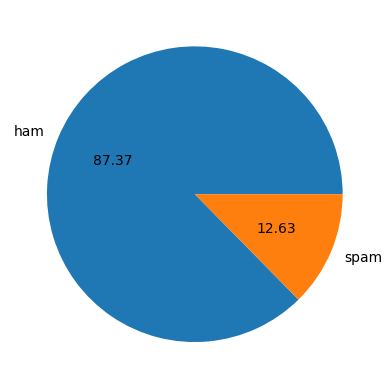

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
import nltk  

In [23]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\AMAN
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_character'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham messages
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Spam messages
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

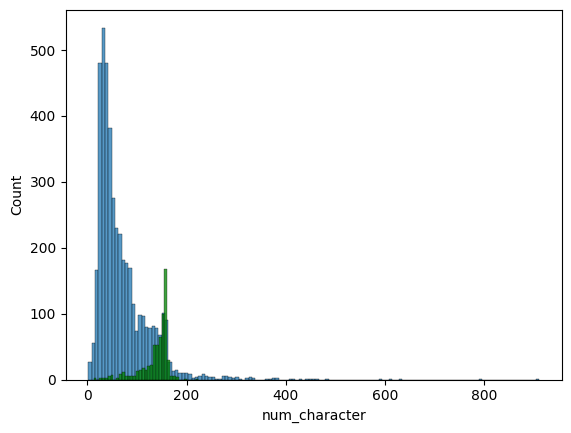

In [34]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

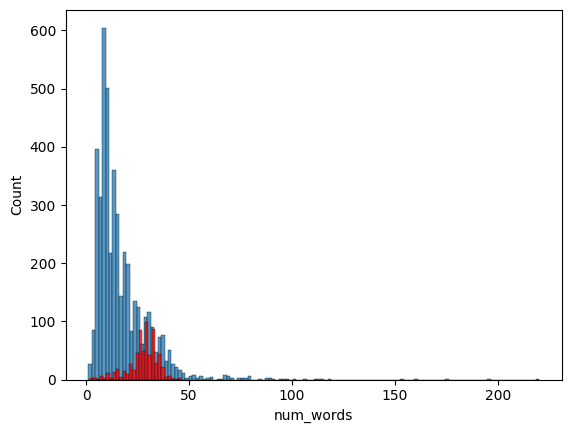

In [35]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

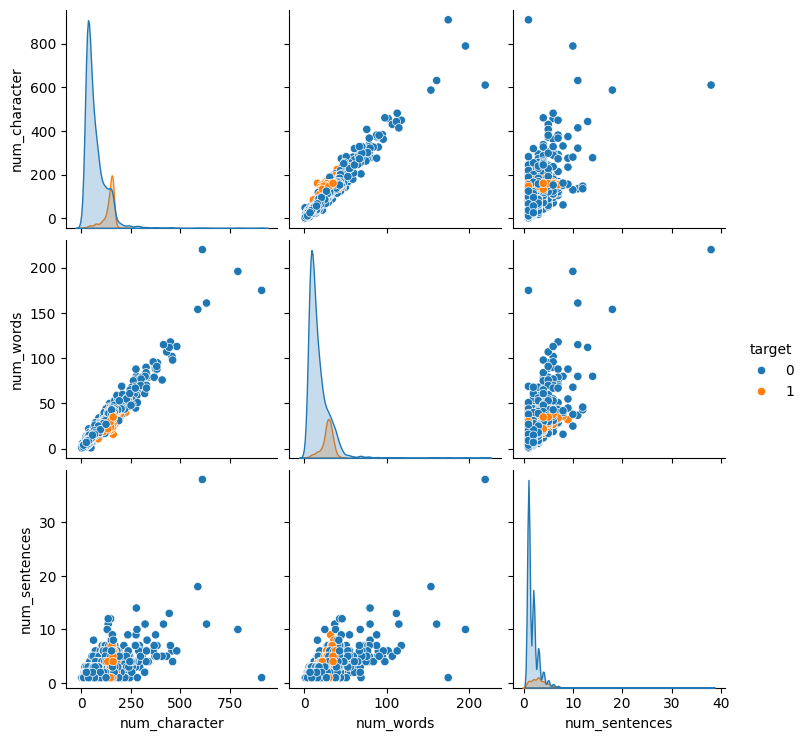

In [36]:
sns.pairplot(df,hue='target')

### 3. Data preprocessing
## .Lower Case
## .Tokenization
## .Removing special character
## .Removing stop words and punctuation
## .Stemming

In [37]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\AMAN
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#Lower case
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)   #Tokenization
#Removing specail character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)  
    text=y[:]
    y.clear()
#Removing stop words and ounstuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('going')

'go'

In [40]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [41]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
df['transform_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

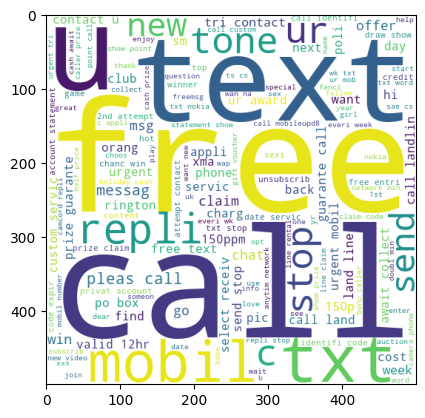

In [46]:
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

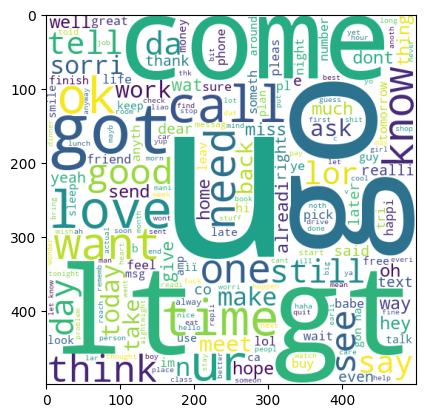

In [48]:
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

<Axes: xlabel='0', ylabel='1'>

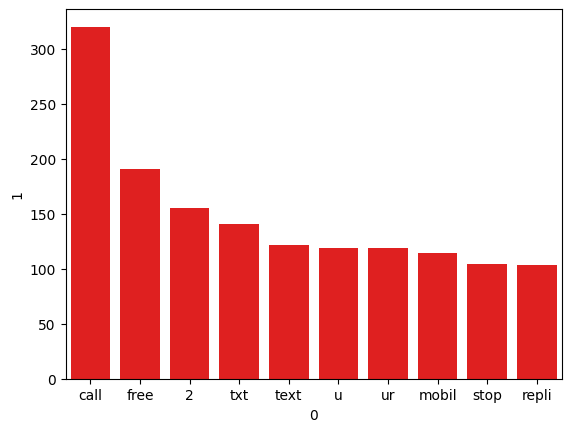

In [51]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(10))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(10))[1],color='red')

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

<Axes: xlabel='0', ylabel='1'>

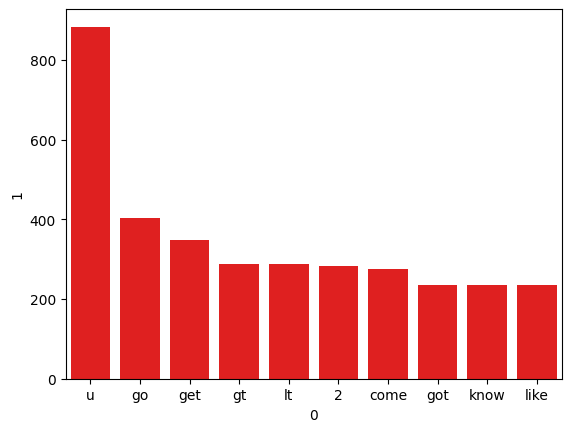

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(10))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(10))[1],color='red')

## 4.Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [56]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[786 110]
 [ 18 120]]
0.5217391304347826


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[876  20]
 [ 12 126]]
0.863013698630137


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
# tfidf -->MNB

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [70]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}
    
    

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [72]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9344262295081968)

In [73]:
train_classifier(knc,X_train,y_train,X_test,y_test)

C:\Users\AMAN RAJ\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\AMAN RAJ\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in _exec

(0.8965183752417795, 1.0)

In [74]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.863013698630137)

In [75]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9352030947775629, 0.8380952380952381)

In [76]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.965183752417795, 0.9903846153846154)

In [77]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.971953578336557, 1.0)

In [78]:
train_classifier(abc,X_train,y_train,X_test,y_test)

C:\Users\AMAN RAJ\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0.9613152804642167, 0.9454545454545454)

In [79]:
train_classifier(bc,X_train,y_train,X_test,y_test)

(0.9584139264990329, 0.8625954198473282)

In [80]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9824561403508771)

In [81]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)

(0.9526112185686654, 0.9238095238095239)

In [82]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9435483870967742)

In [83]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9690522243713733
Precision - 0.9344262295081968
For KN
Accuracy - 0.8965183752417795
Precision - 1.0
For NB
Accuracy - 0.9690522243713733
Precision - 0.863013698630137
For DT
Accuracy - 0.937137330754352
Precision - 0.8543689320388349
For LR
Accuracy - 0.965183752417795
Precision - 0.9903846153846154
For RF
Accuracy - 0.971953578336557
Precision - 1.0


C:\Users\AMAN RAJ\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For Bgc
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For xgb
Accuracy - 0.9729206963249516
Precision - 0.9435483870967742


In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
5,RF,0.971954,1.000000
4,LR,0.965184,0.990385
8,ETC,0.972921,0.982456
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
0,SVC,0.969052,0.934426
9,GBDT,0.952611,0.923810
2,NB,0.969052,0.863014
7,Bgc,0.958414,0.862595


In [86]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [87]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,RF,Accuracy,0.971954
2,LR,Accuracy,0.965184
3,ETC,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,xgb,Accuracy,0.972921
6,SVC,Accuracy,0.969052
7,GBDT,Accuracy,0.952611
8,NB,Accuracy,0.969052
9,Bgc,Accuracy,0.958414


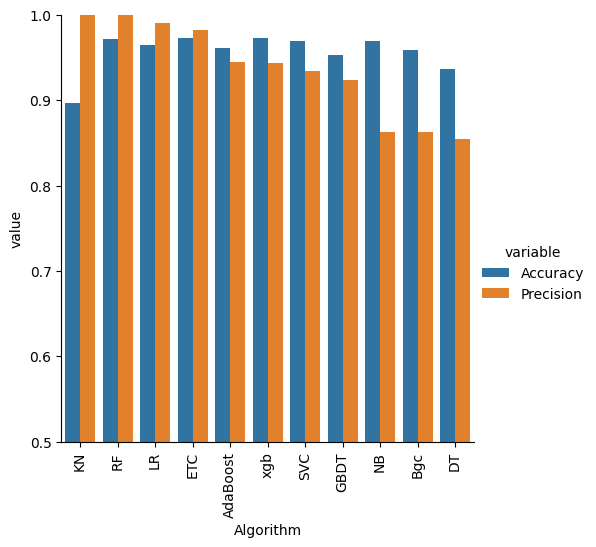

In [88]:
sns.catplot(x = 'Algorithm',y='value',
            hue = 'variable',data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
#model improve
#1. Change the max_features parameter of TfIdf

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [95]:
new_df_scaled.merge(temp_df,on='Algorithm',suffixes=('_new', '_temp'))

,Algorithm,Accuracy,Precision_x,Accuracy_scaling_x,Precision_y,Accuracy_scaling_y,Precision_new,Accuracy_num_chars,Precision_temp
0,KN,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,LR,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
5,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
6,SVC,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426
7,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
8,NB,0.969052,0.863014,0.969052,0.863014,0.969052,0.863014,0.969052,0.863014
9,Bgc,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [96]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [98]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [100]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [101]:
from sklearn.ensemble import StackingClassifier

In [102]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))